**Progetto Machine Learning**

Partecipanti
- Fiorentini Nicolò  933157
- Anoir Kadmiri 933097


In questo progetto si propone l'analisi di un dataset, applicazione di tecniche di formattazione e di trasformazione dei dati. Successivamente abbiamo una implementazione alcuni modelli e per concludere abbiamo un confronto delle performance tra i differenti modelli applicati. Dopo una fase iniziale di esplorazione, i dati vengono puliti e normalizzati per garantire qualità e coerenza. Successivamente, vengono applicati di machine learning per individuare pattern, effettuare previsioni. L’obiettivo finale è fornire un confronto tra i modelli applicati, misurandone le perfomance e l'efficenza.









In [2]:
#Diamo accesso al nostro google drive che conterrà il dataset che utilizzeremo
from google.colab import drive
import pandas as pd
import numpy as np
import sklearn as sn
import requests
import seaborn as sns

#drive.mount('/content/drive/')
#df = pd.read_csv("drive/MyDrive/Dataset/diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv")
url = "https://raw.githubusercontent.com/NIKFIORE/Progetto-Machine-Learning/refs/heads/main/Dataset/diabetes%20_%20binary%20_%205050split%20_%20health%20_%20indicators%20_%20BRFSS2015.csv"
# Carica il dataset direttamente da GitHub
df = pd.read_csv(url)

df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
df.dtypes

,0
Diabetes_binary,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
#verifico se ci sono valori mancanti
missing_value = df.isnull().values.any()
if not missing_value: x = "non"
print(f"Questo dataset {x} ha valori mancanti")

Questo dataset non ha valori mancanti


In [6]:
#controllo la presenza di valori nulli
df.isnull().sum().any()

False

In [7]:
numeric_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(numeric_columns)

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


ANALISI DEL DATASET

Analisi univariante

L'analisi si riferisce all'esplorazione statistica e grafica di ciascuna variabile numerica separatamente, senza considerare relazioni tra più variabili.Questa analisi è utile per comprendere la distribuzione e la variabilità dei dati prima di passare a metodi più complessi come l'analisi multivariata.

In [8]:
numeric_data = df[numeric_columns]

# Statistiche descrittive
print("\nStatistiche descrittive:")
print(numeric_data.describe())



Statistiche descrittive:
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000

In [46]:
num_categories = df["Diabetes_binary"].nunique()  # Conta le categorie uniche
categories = df["Diabetes_binary"].unique()  # Ottiene le categorie uniche

print("Numero di categorie:", num_categories)
print("Categorie:", categories)

Numero di categorie: 2
Categorie: [0. 1.]


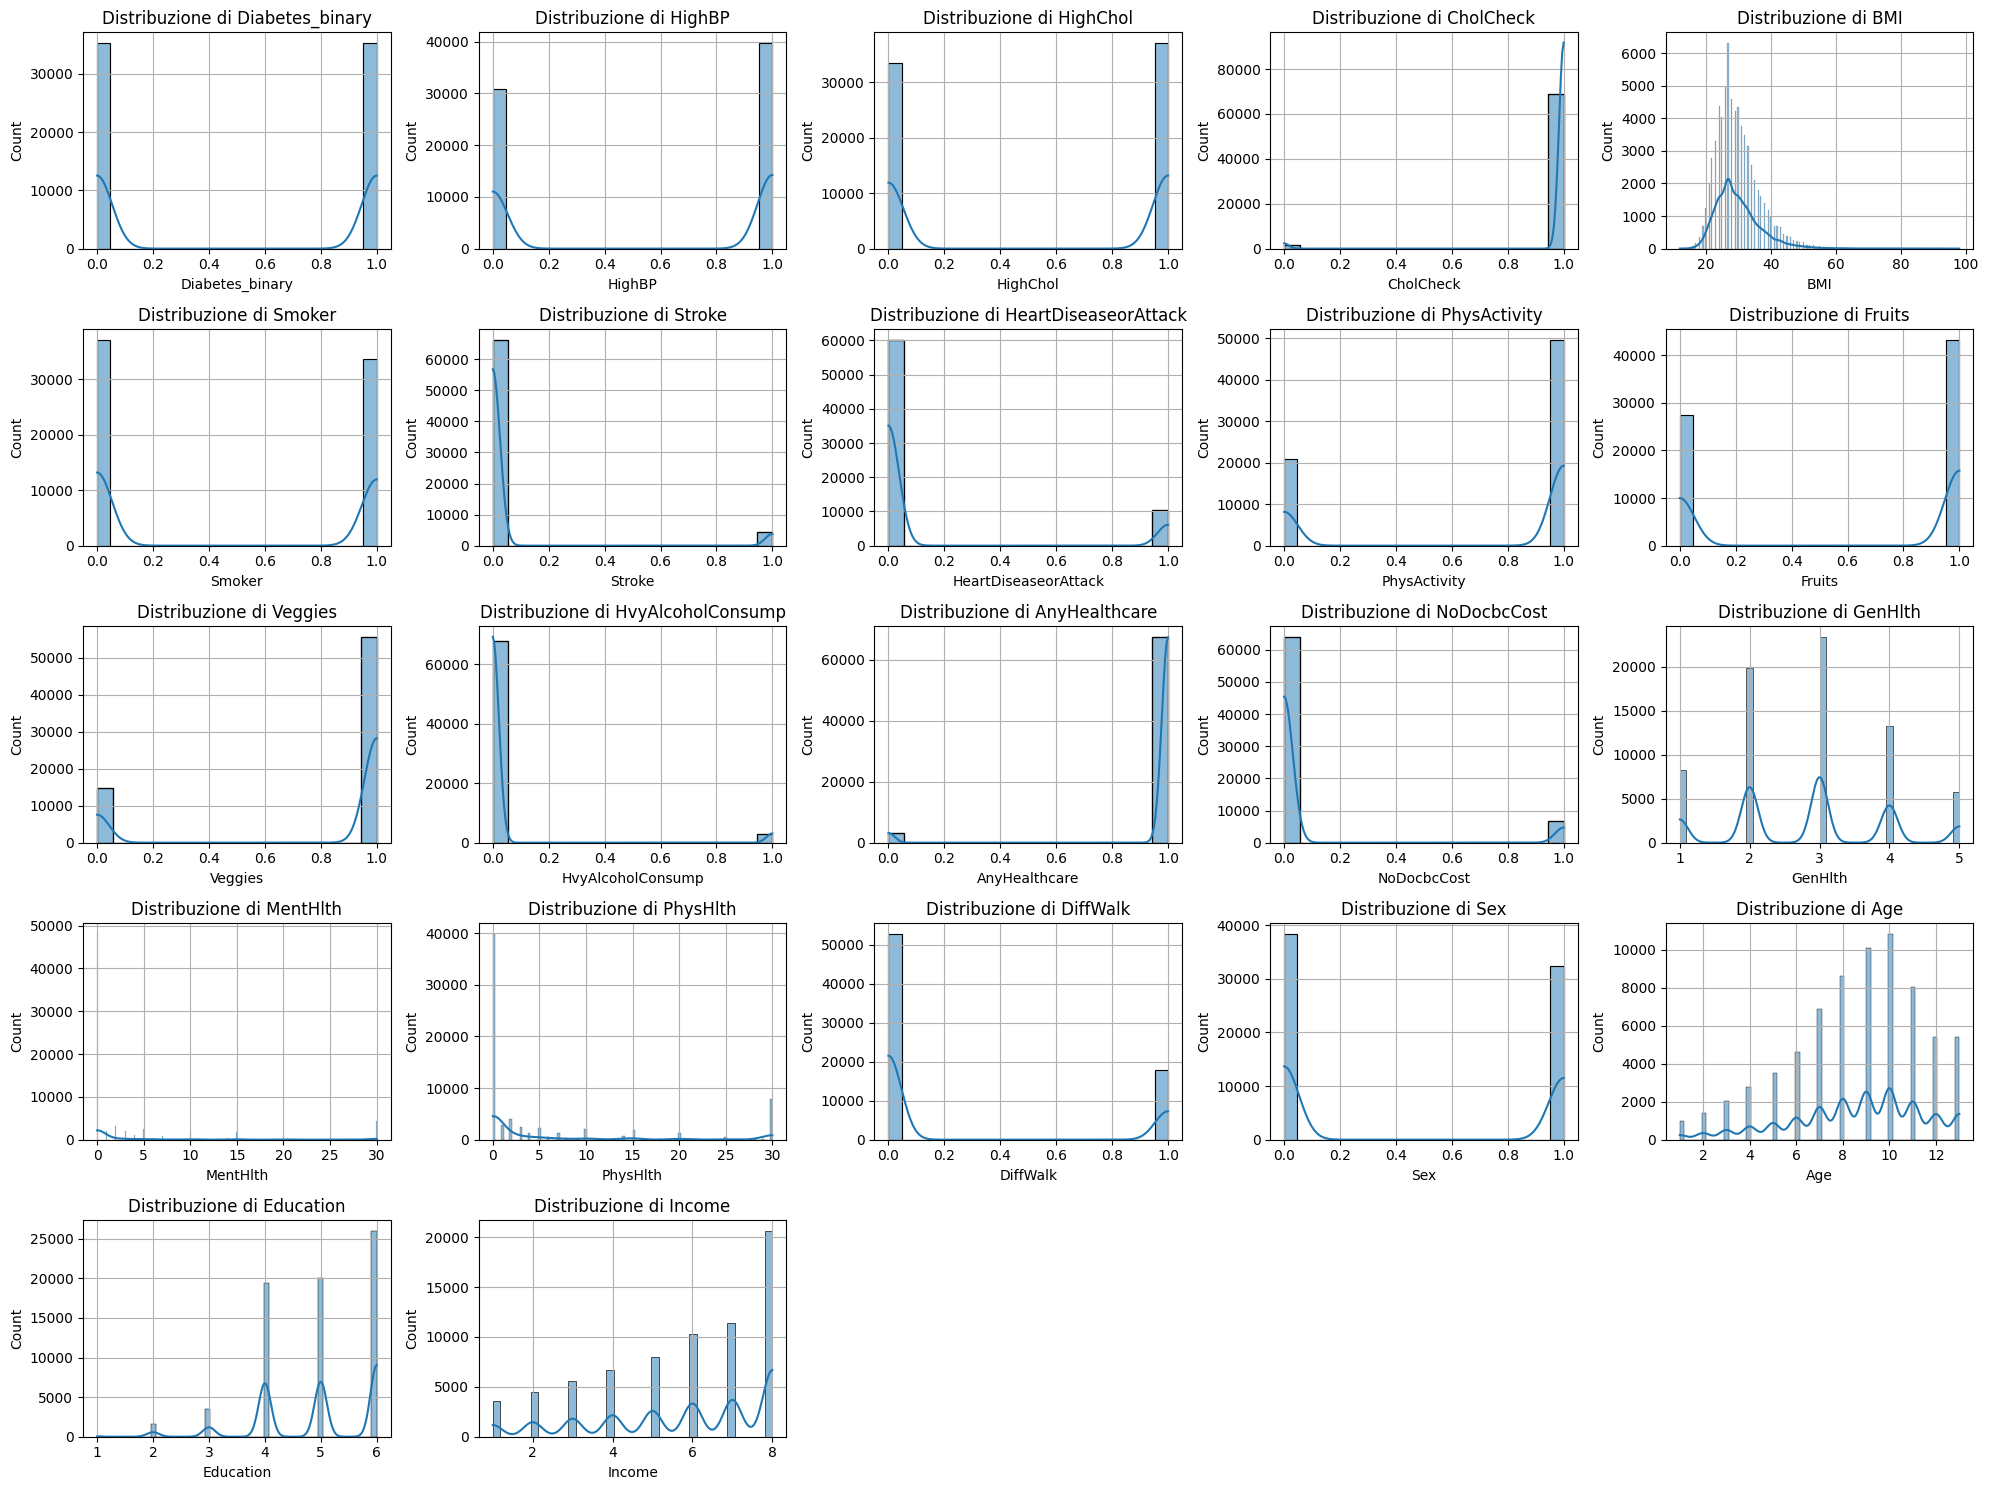

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(5, 5, i+1)
    # Istogramma
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()

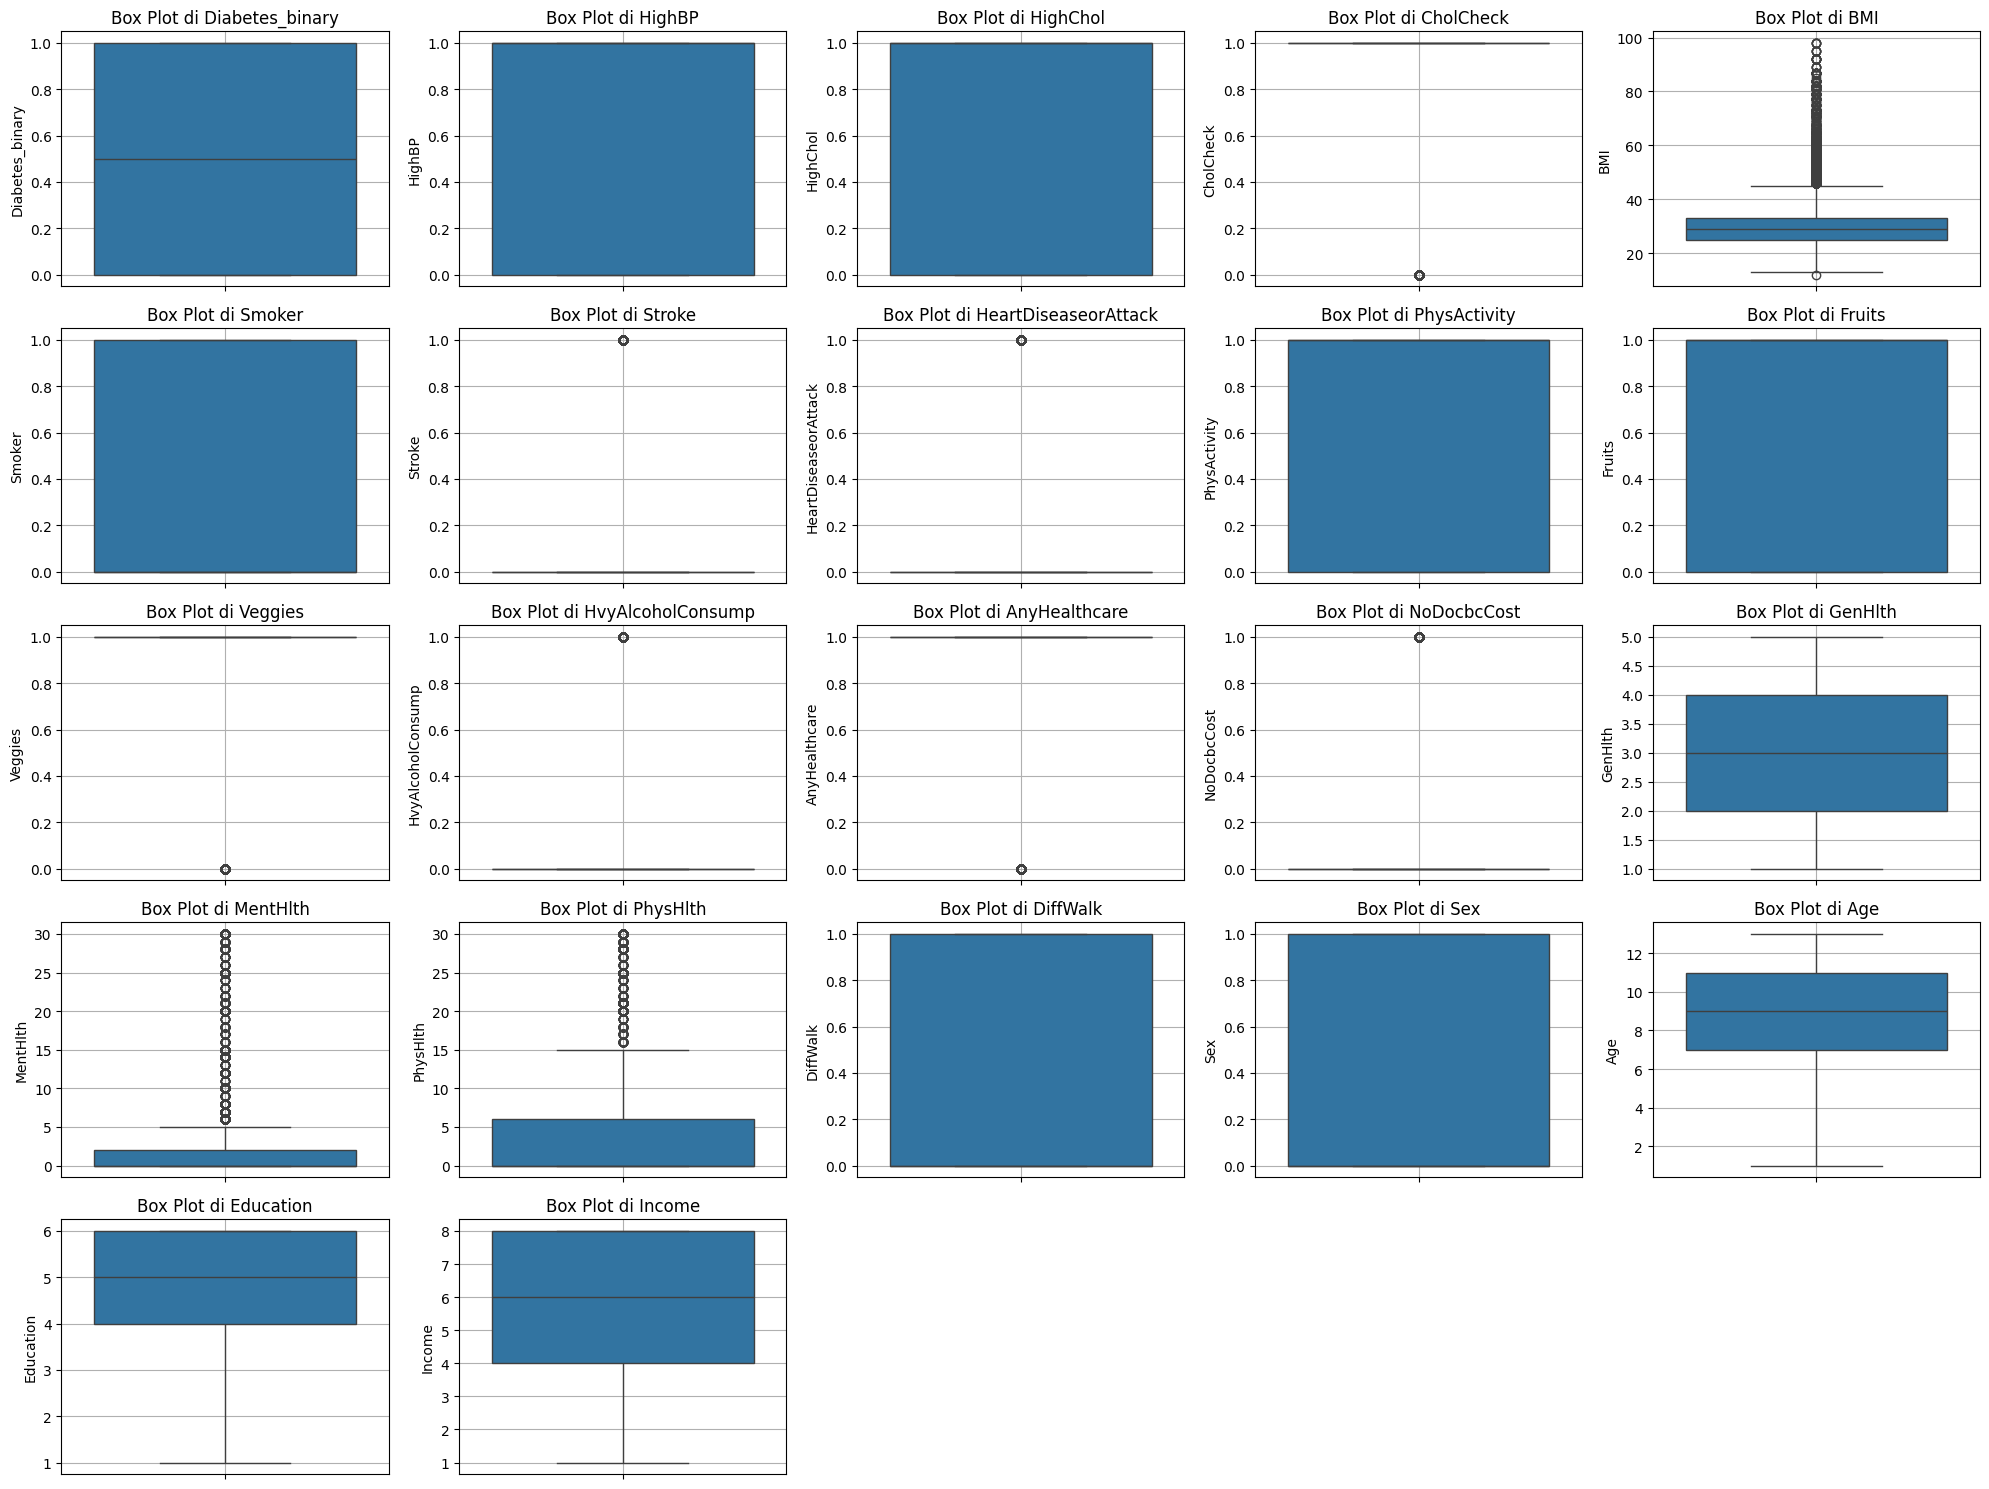

In [10]:
# 3. Box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot di {column}')
    plt.grid(True)
plt.tight_layout()
plt.show()

ANALISI MULTIVARIANTE



L'analisi multivariante riguarda lo studio delle relazioni tra più variabili contemporaneamente, con particolare attenzione a come le caratteristiche numeriche influenzano il prezzo.

In [11]:
# Calcolo della matrice di correlazione
correlation_matrix = numeric_data.corr()
correlation_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


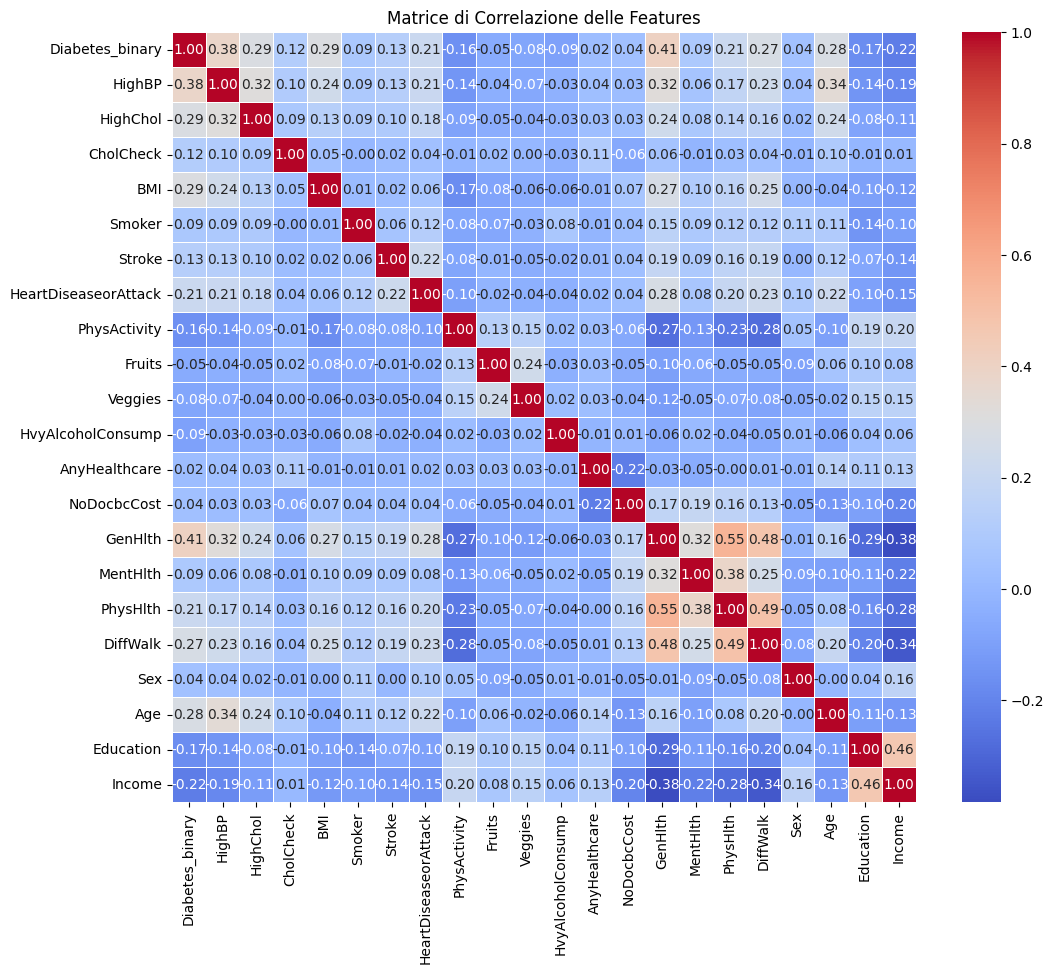

In [12]:
# Heatmap della matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione delle Features')
plt.show()

In [13]:
# Correlazione con il target
diabetes_correlation = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print("\nCorrelazione delle features con la diagnosi PCOS:")
print(diabetes_correlation)


Correlazione delle features con la diagnosi PCOS:
Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


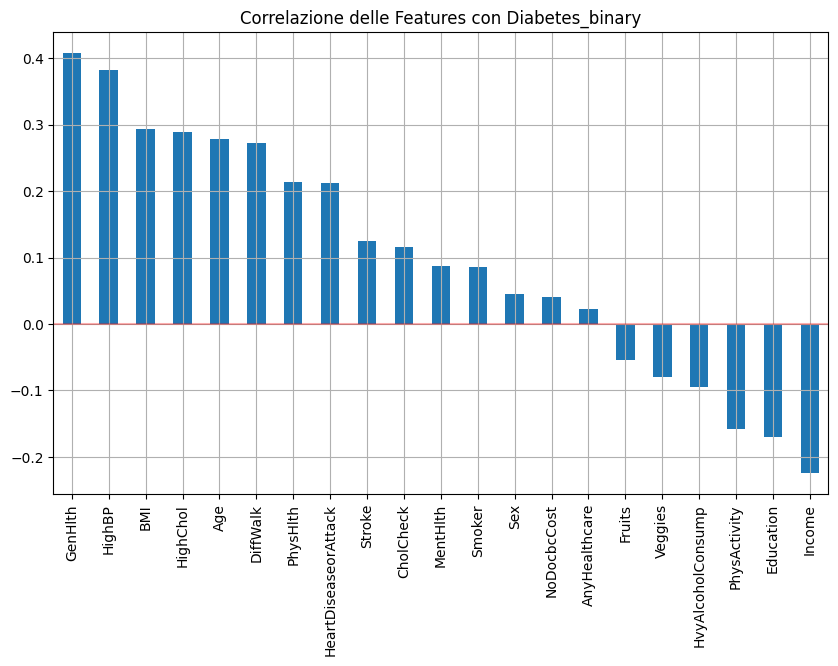

In [14]:
# Visualizzazione grafica delle correlazioni con il target
plt.figure(figsize=(10, 6))
diabetes_correlation.drop('Diabetes_binary').plot(kind='bar')
plt.title('Correlazione delle Features con Diabetes_binary')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True)
plt.show()

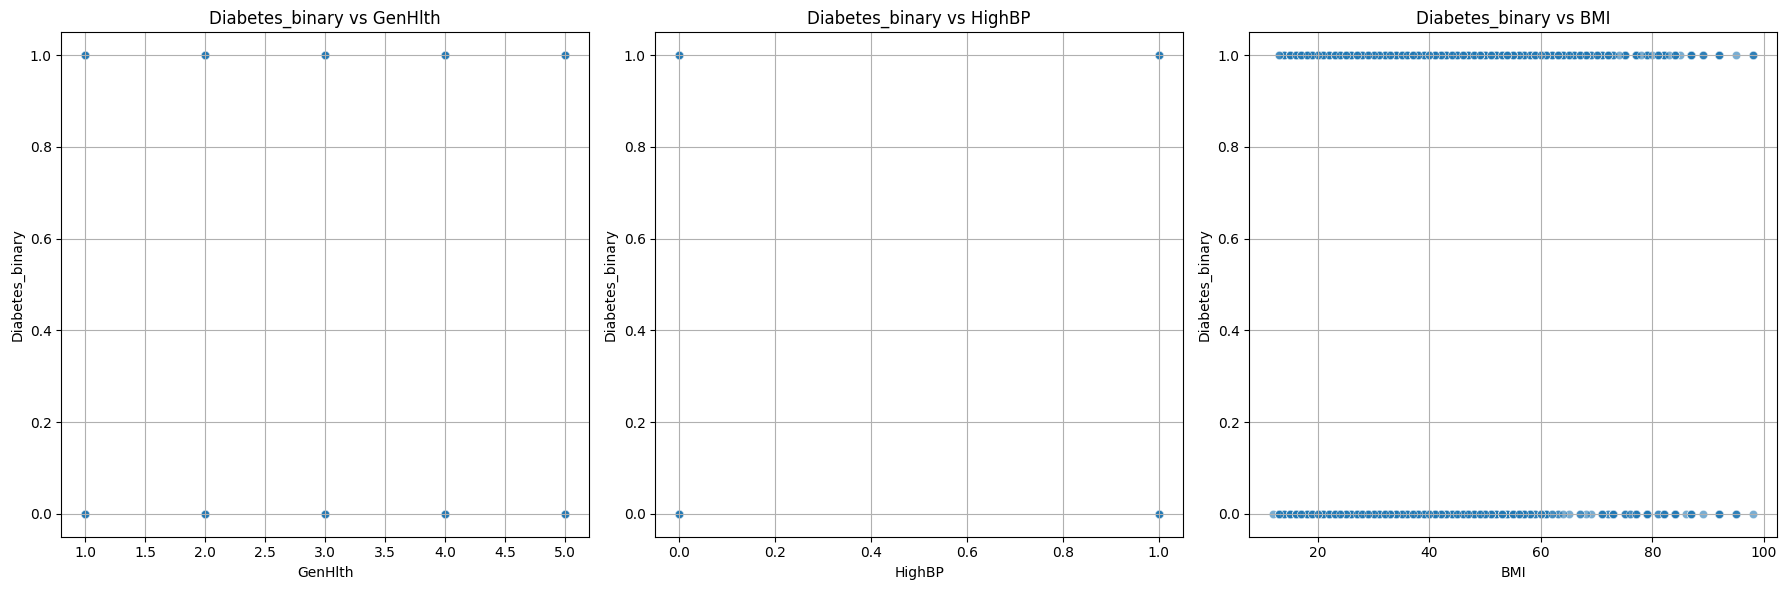

In [15]:
# Scatter plot tra variabili più correlate
top_correlated = diabetes_correlation.drop('Diabetes_binary').abs().nlargest(3).index.tolist()

plt.figure(figsize=(18, 6))
for i, feature in enumerate(top_correlated):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['Diabetes_binary'], alpha=0.6)
    plt.title(f'Diabetes_binary vs {feature}')
    plt.grid(True)

plt.tight_layout()
plt.show()

APPLICAZIONE PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data

array([[-1.        ,  0.88020109, -1.05279808, ..., -1.60723742,
         1.04856175,  1.05815996],
       [-1.        ,  0.88020109,  0.94984976, ...,  1.19768093,
         1.04856175,  1.05815996],
       [-1.        , -1.13610402, -1.05279808, ...,  1.54829572,
         1.04856175,  1.05815996],
       ...,
       [ 1.        ,  0.88020109,  0.94984976, ...,  1.54829572,
         1.04856175, -0.78076781],
       [ 1.        ,  0.88020109,  0.94984976, ...,  0.84706614,
        -2.83842972, -0.78076781],
       [ 1.        ,  0.88020109,  0.94984976, ...,  0.14583655,
         1.04856175, -1.70023169]])

In [17]:
# Applicazione della PCA
pca = PCA().fit(scaled_data)

# Varianza spiegata
print("\nVarianza spiegata da ciascuna componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza cumulativa spiegata:")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)


Varianza spiegata da ciascuna componente:
[0.17757688 0.0820032  0.06073183 0.05520657 0.05410346 0.05096877
 0.04679942 0.04276153 0.04241056 0.03958435 0.03726111 0.03605515
 0.03380319 0.03347256 0.03210843 0.03200211 0.02948895 0.02773305
 0.02483162 0.02253007 0.02112955 0.01743766]

Varianza cumulativa spiegata:
[0.17757688 0.25958008 0.3203119  0.37551847 0.42962193 0.4805907
 0.52739013 0.57015166 0.61256222 0.65214656 0.68940768 0.72546283
 0.75926601 0.79273857 0.824847   0.8568491  0.88633805 0.9140711
 0.93890272 0.96143279 0.98256234 1.        ]


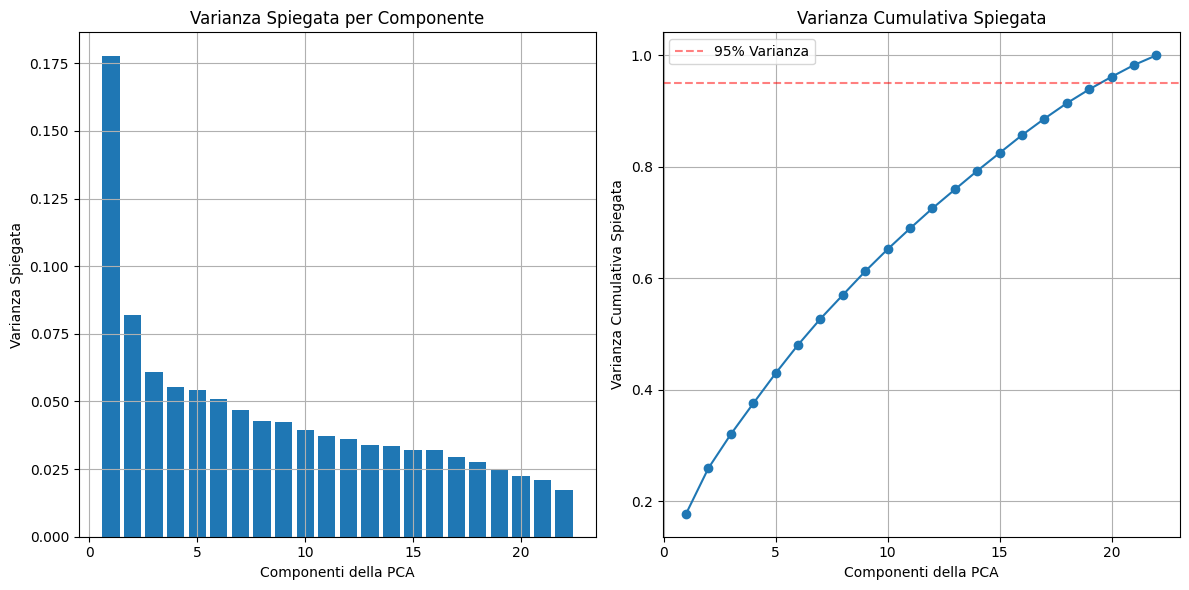

In [18]:
# Visualizzazione della varianza spiegata
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza Spiegata')
plt.title('Varianza Spiegata per Componente')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='95% Varianza')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('Varianza Cumulativa Spiegata')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# Determinare il numero di componenti necessarie per spiegare il 95% della varianza
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1 # Prima componente che supera il 95%
print(f"\nNumero di componenti necessarie per spiegare il 95% della varianza: {n_components_95}")


Numero di componenti necessarie per spiegare il 95% della varianza: 20


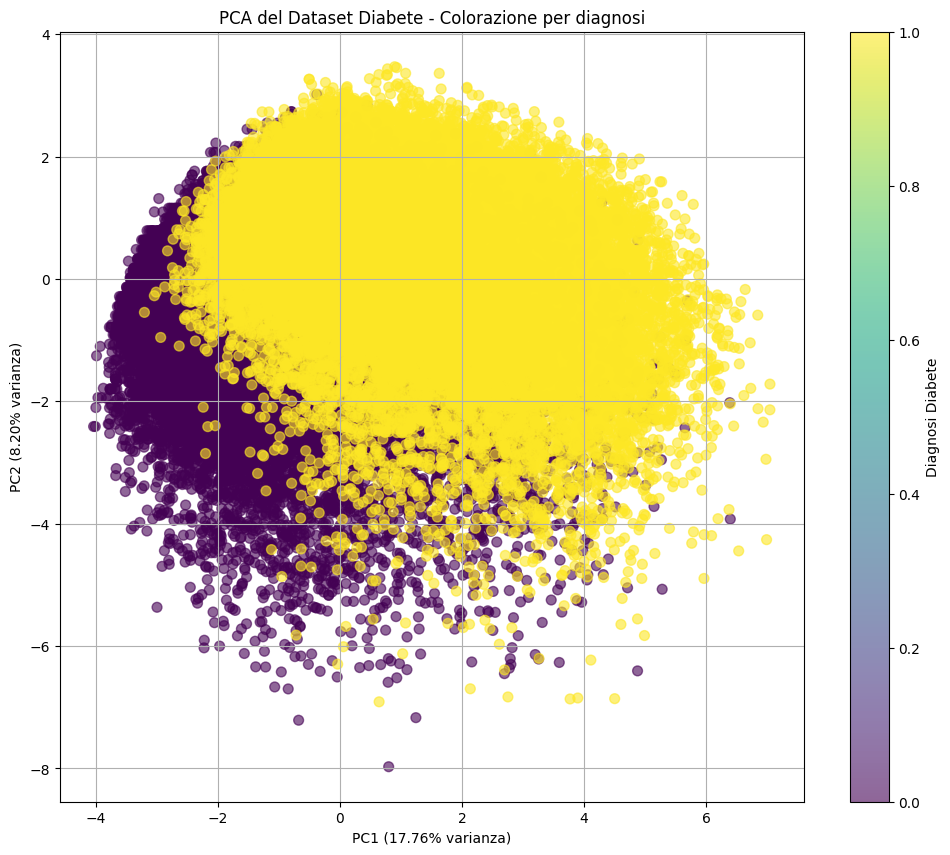

In [20]:
# Riduzione della dimensionalità ai componenti necessari
pca_95 = PCA(n_components=n_components_95)
pca_data_95 = pca_95.fit_transform(scaled_data)

# Riduzione a due componenti per visualizzazione
pca_2 = PCA(n_components=2)
pca_data_2 = pca_2.fit_transform(scaled_data)

# Creiamo un DataFrame con le prime 2 componenti principali
pca_df = pd.DataFrame(data=pca_data_2, columns=['PC1', 'PC2'])
# Aggiungiamo alcune colonne originali per colorare il grafico
pca_df['Diabetes_binary'] = df['Diabetes_binary']

# Visualizzazione delle prime 2 componenti principali
plt.figure(figsize=(12, 10))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Diabetes_binary'],
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Diagnosi Diabete')
plt.xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]:.2%} varianza)')
plt.title('PCA del Dataset Diabete - Colorazione per diagnosi')
plt.grid(True)
plt.show()

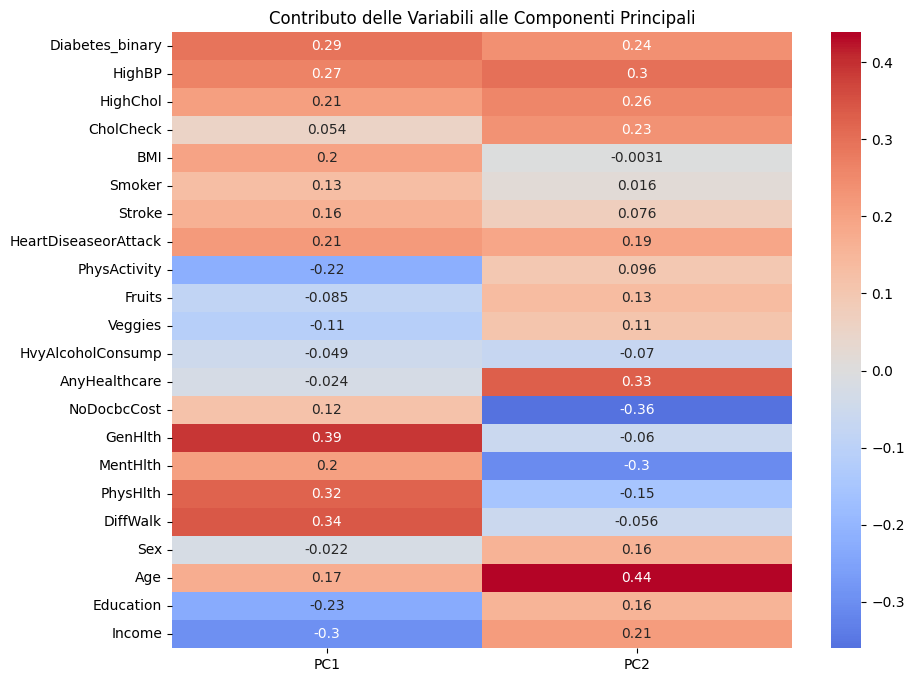

In [21]:
# Visualizzazione dei loadings (contributi delle variabili originali alle componenti)
loadings = pd.DataFrame(
    pca_2.components_.T,
    columns=['PC1', 'PC2'],
    index=numeric_columns
)

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Contributo delle Variabili alle Componenti Principali')
plt.show()

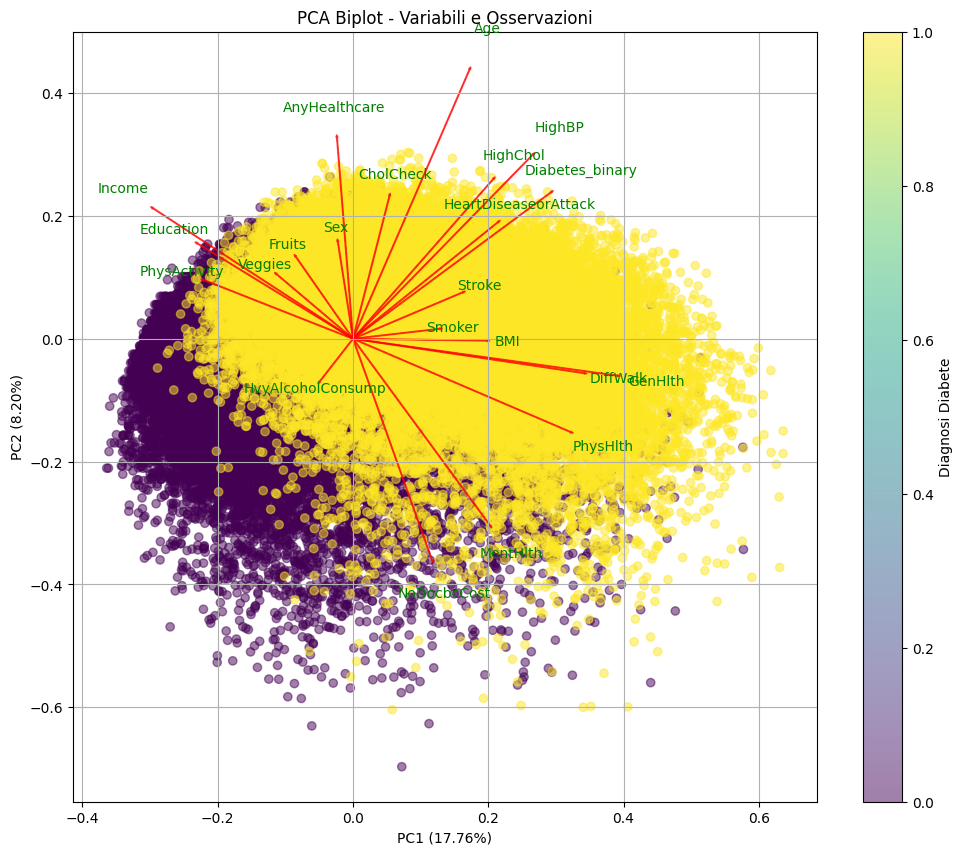

In [22]:
def biplot(score, coef, labels=None):
    plt.figure(figsize=(12, 10))
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]

    # Scala per visualizzare meglio
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, c=df['Diabetes_binary'], cmap='viridis', alpha=0.5)
    plt.colorbar(label='Diagnosi Diabete')

    for i in range(n):
        plt.arrow(0, 0, coef[i,0], coef[i,1], color='r', alpha=0.7) # Vettori delle variabili originali
        if labels is None:
            plt.text(coef[i,0]* 1.15, coef[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coef[i,0]* 1.15, coef[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel(f"PC1 ({pca_2.explained_variance_ratio_[0]:.2%})")
    plt.ylabel(f"PC2 ({pca_2.explained_variance_ratio_[1]:.2%})")
    plt.grid(True)
    plt.title("PCA Biplot - Variabili e Osservazioni")

# Creiamo il biplot
biplot(pca_data_2, np.transpose(pca_2.components_), labels=numeric_columns)
plt.show()

In [23]:
# Interpretazione delle componenti principali
print("\nInterpretazione delle componenti principali:")
for i in range(2):
    sorted_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
    print(f"\nComponente PC{i+1}:")
    print(f"Varianza spiegata: {pca_2.explained_variance_ratio_[i]:.2%}")
    print("Principali contributi (variabili e loro pesi):")
    print(sorted_loadings.head(3))


Interpretazione delle componenti principali:

Componente PC1:
Varianza spiegata: 17.76%
Principali contributi (variabili e loro pesi):
GenHlth     0.390628
DiffWalk    0.341672
PhysHlth    0.321731
Name: PC1, dtype: float64

Componente PC2:
Varianza spiegata: 8.20%
Principali contributi (variabili e loro pesi):
Age              0.438702
NoDocbcCost      0.360265
AnyHealthcare    0.327748
Name: PC2, dtype: float64


Prepariamo il dataset per applicare i modelli

In [47]:
from sklearn.model_selection import train_test_split
# Step 1: Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardizzare le feature (importante per le reti neurali)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Convertire le etichette in formato categorico (one-hot encoding)
y_train_cat = keras.utils.to_categorical(y_train, 3)  # 3 classi: 0, 1, 2
y_test_cat = keras.utils.to_categorical(y_test, 3)

y_train_cat

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

RETE NEURALE

 Le Reti Neurali sono modelli di apprendimento supervisionato, il che significa
 che vengono addestrate su un dataset di esempi etichettati, dove sia gli input
 che gli output desiderati sono noti. Durante la fase di addestramento, la rete
 neurale impara a mappare gli input agli output corrispondenti, aggiustando i
 pesi delle connessioni tra i nodi per minimizzare l’errore tra l’output previsto e l’output desiderato.

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Definisci l'architettura del modello di rete neurale
model = Sequential()
model.add(Dense(16, input_shape=(X_train_scaled.shape[1],), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

# Compila il modello
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Mostra il riepilogo dell'architettura del modello
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Addestramento del modello
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6668 - loss: 0.6900 - val_accuracy: 0.7446 - val_loss: 0.5154
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7489 - loss: 0.5123 - val_accuracy: 0.7453 - val_loss: 0.5108
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7513 - loss: 0.5075 - val_accuracy: 0.7440 - val_loss: 0.5143
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7540 - loss: 0.5038 - val_accuracy: 0.7470 - val_loss: 0.5092
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7561 - loss: 0.5035 - val_accuracy: 0.7476 - val_loss: 0.5079
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7552 - loss: 0.5023 - val_accuracy: 0.7476 - val_loss: 0.5071
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7586 - loss: 0.4996 - val_accuracy: 0.7487 - val_loss: 0.5065
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7530 - loss: 0.5028 - 

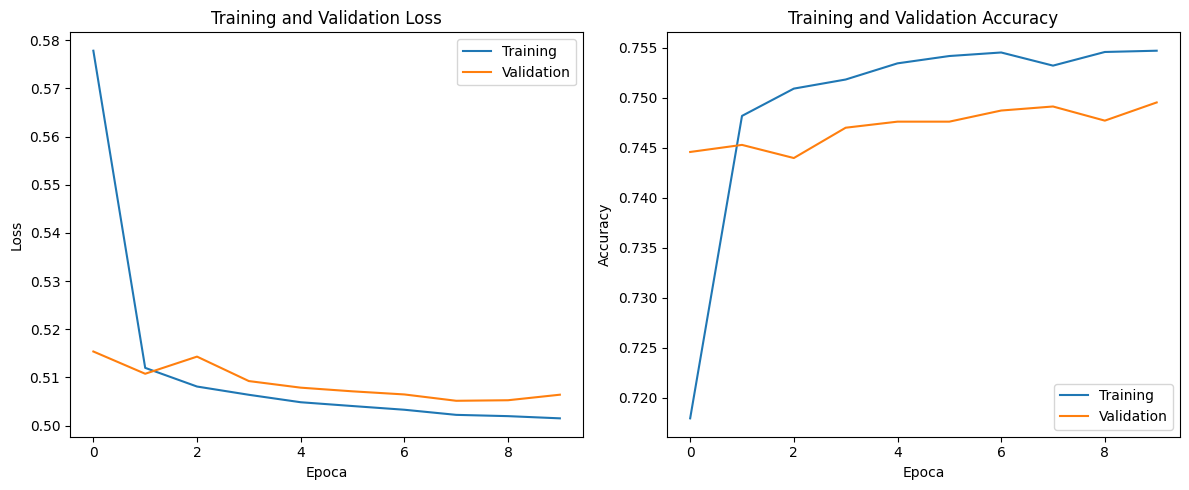

In [36]:
# Plot della loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoca')
plt.legend(['Training', 'Validation'], loc='upper right')

# Plot dell'accuratezza
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoca')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()

In [39]:
# Predizioni sui set di training e test (probabilità per ogni classe)
y_pred_train_prob = model.predict(X_train_scaled)
y_pred_train_classes = np.argmax(y_pred_train_prob, axis=1)

y_pred_test_prob = model.predict(X_test_scaled)
y_pred_test_classes = np.argmax(y_pred_test_prob, axis=1)

# Report di classificazione per training e test
print("\nReport di Classificazione - Training Set:")
print(classification_report(y_train, y_pred_train_classes,
                          target_names=['No Diabetes', 'Prediabetes', 'Diabetes']))

print("\nReport di Classificazione - Test Set:")
print(classification_report(y_test, y_pred_test_classes,
                          target_names=['No Diabetes', 'Prediabetes', 'Diabetes']))


1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Report di Classificazione - Training Set:


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

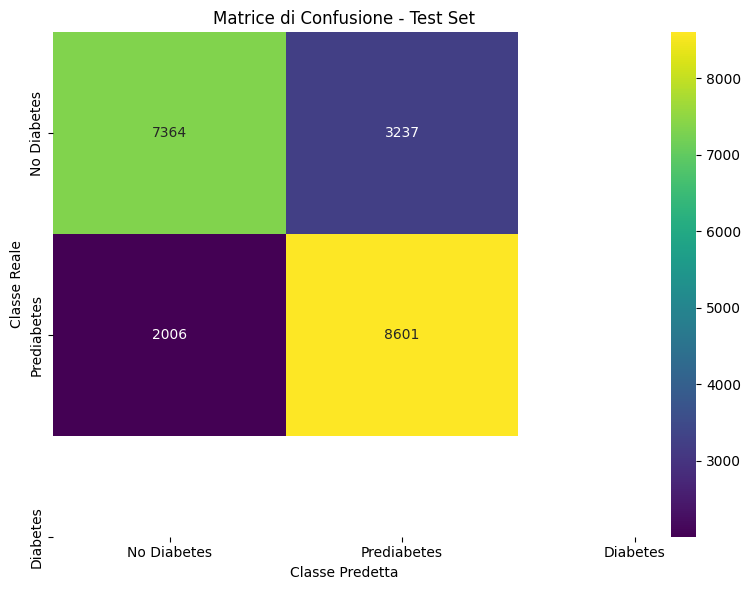

In [40]:
# Matrice di confusione
plt.figure(figsize=(8, 4))
cm_test = confusion_matrix(y_test, y_pred_test_classes)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='viridis', center=0)
plt.title('Matrice di Confusione - Test Set')
plt.ylabel('Classe Reale')
plt.xlabel('Classe Predetta')
plt.tight_layout()
plt.show()


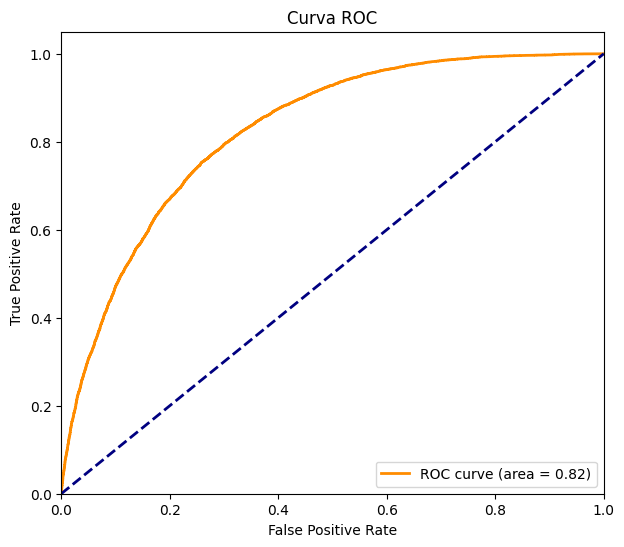

In [ ]:
# Calcolo della curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()